# Clustering Exercise
The objective of this exercise is to cluster customers of a telephone company (`data.csv`) and evaluate the clusters found.

### Part 1: Data Preparation

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler  
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics

In [2]:
# Load dataset and display the first five rows
data = pd.read_csv('data.csv')
data.head()

,Account length,International plan,Voice mail plan,Number voice mail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**Task 01 (of 11): Create a new numerical attribute named 'Total charge' that contains the sum of the attributes 'Total day charge', 'Total eve charge', and 'Total night charge'.**

In [3]:
data['Total charge'] = data['Total day charge'] + data['Total eve charge'] + data['Total night charge']

In [4]:
data.head()

,Account length,International plan,Voice mail plan,Number voice mail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,72.86
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,55.54
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,59.00
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,65.02
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,49.36


In [5]:
# Partition the dataset into attributes and true clusters (churned/non-churned)
# Consider only the following attributes: 'International plan', 'Total charge', and 'Customer service calls'
X = data[['International plan', 'Total charge', 'Customer service calls']]
Y = data['Churn']

**Task 02 (of 11): Standardize the attributes.**

In [6]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

### Part 2: Hierarchical Clustering

**Task 03 (of 11): Cluster the dataset using hierarchical clustering with single linkage method.
Use single linkage as the method and Euclidean distance as the distance metric.**

In [7]:
clustering = linkage(X_scaled, method='single', metric='euclidean')
clusters = fcluster(clustering, 2, criterion = 'maxclust')

In [8]:
print(clusters)

[1 1 1 ... 1 2 1]


**Task 04 (of 11): Plot contingency matrix and compute evaluation metrics for hierarchical clustering with single linkage method.**

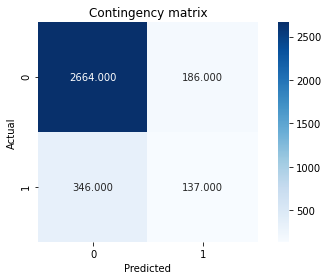

In [9]:
cont_matrix = metrics.cluster.contingency_matrix(Y, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [10]:
adjusted_rand_index = metrics.adjusted_rand_score(Y, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.201747491556069, 0.5588810706001527]


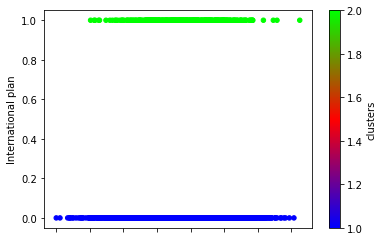

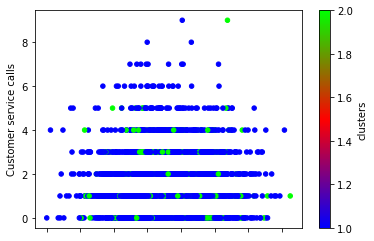

In [11]:
# Plot clusters found using hierarchical clustering with single linkage method
data['clusters'] = clusters
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'International plan', c = 'clusters', colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'Customer service calls', c = 'clusters', colormap = plt.cm.brg)

**Question 01 (of 07): What can you conclude about the clusters found using hierarchical clustering with single linkage method from the plot and the evaluation metrics?**

**Answer:** From the evaluation metrics, especially the rand score, it is clear that the clusters are really bad.
If we consider the plot for the international plan, the clusters are really well formed but the data distribution is not the same ie the actual data is not clustered in that manner(proven by evaluation metrics).

The single linkage hierarchical method which considers the minimum distance between the clusters has clustered all the data points based on international plan attribute which resulted in overlapping clusters in the customer service calls dimension. The choice of attributes to cluster is incorrect as it does not form clusters that give a good rand score.

**Task 05 (of 11): Cluster the dataset using hierarchical clustering with complete linkage method.
Use complete linkage as the method and Euclidean distance as the distance metric.**

In [12]:
clustering = linkage(X_scaled, method='complete', metric='euclidean')
clusters = fcluster(clustering, 2, criterion = 'maxclust')

In [13]:
clusters

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

**Task 06 (of 11): Plot contingency matrix and compute evaluation metrics for hierarchical clustering with complete linkage method.**

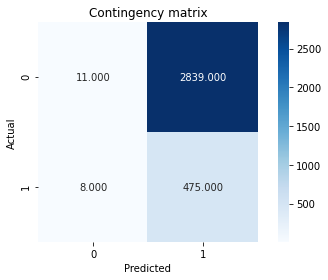

In [14]:
cont_matrix = metrics.cluster.contingency_matrix(Y,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [15]:
adjusted_rand_index = metrics.adjusted_rand_score(Y, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.017507021065270037, 0.5130278392459514]


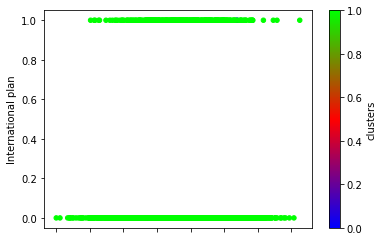

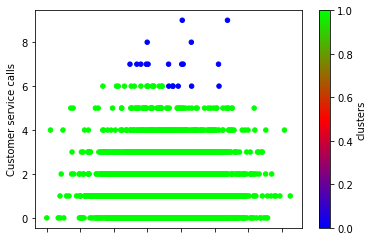

In [16]:
# Plot clusters found using hierarchical clustering with complete linkage method
data['clusters'] = clusters - 1
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'International plan', c = 'clusters', colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'Customer service calls', c = 'clusters', colormap = plt.cm.brg)

**Question 02 (of 07): What can you conclude about the clusters found using hierarchical clustering with complete linkage method from the plot and the evaluation metrics?**

**Answer:** From the evaluation metrics, especially the rand score, it is clear that the clusters are really bad. If we consider the plot for the customer service calls, the clusters are quite well formed but the data distribution is not the same ie the actual data is not clustered in that manner(proved by evaluation metrics). It gives two separate clusters which is the complete opposite of the single linkage mehtod.
The silhoute coefficient is worse than single linkage because of the closeness and overlap in clusters in both the dimensions.

The complete linkage hierarchical method which considers the minimum of the maximum distance between the clusters has clustered all the data points based on customer service calls attribute which resulted in overlapping clusters in the internation plan dimension.

### Part 3: K-Means Clustering

**Task 07 (of 11): Cluster the dataset using K-Means clustering.
Use random initialization of centroids, 10 iterations, and set parameter `random_state` to 0.**

In [17]:
clustering = KMeans(n_clusters=2, init='random',n_init=10,random_state=0).fit(X_scaled)
clusters = clustering.labels_

**Task 08 (of 11): Plot contingency matrix and compute evaluation metrics for K-Means clustering.**

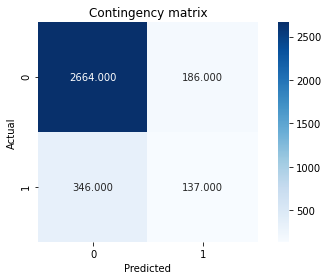

In [18]:
cont_matrix = metrics.cluster.contingency_matrix(Y,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [19]:
adjusted_rand_index = metrics.adjusted_rand_score(Y, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.201747491556069, 0.5588810706001527]


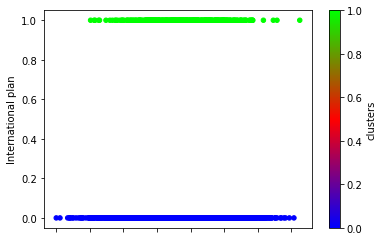

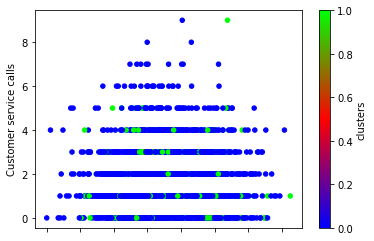

In [20]:
# Plot clusters found using K-Means clustering
data['clusters'] = clusters
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'International plan', c = 'clusters', colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'Customer service calls', c = 'clusters', colormap = plt.cm.brg)
# ax.set(title = 'iris data', xlabel = 'petal width', ylabel = 'petal length')

**Question 03 (of 07): What can you conclude about the clusters found using K-Means clustering from the plot and the evaluation metrics?**

**Answer:**  From the evaluation metrics, especially the rand score, it is clear that the clusters are really bad. If we consider the plot for the international plan, the clusters are really well formed(as seen from the plot and silhoutte coef) but the data distribution is not the same ie the actual data is not clustered in that manner(proved by evaluation metrics).

The Kmeans method which initializes centroids and assigns points to them based on min distance, formed clusters based on the international plan and all the 0's and 1's formed the two separate clusters which is not actually the relation with the actual data. The choice of attributes to cluster is incorrect as it does not form 2 separate clusters.

### Part 4: DBSCAN

**Task 09 (of 11): Cluster the dataset using DBSCAN.
Use parameters `Eps=2`, `MinPts=5`, and Euclidean distance as the distance metric.**

In [21]:
clustering = DBSCAN(eps=2,min_samples=5).fit(X_scaled)
clusters = clustering.labels_

**Task 10 (of 11): Plot contingency matrix and compute evaluation metrics for DBSCAN.**

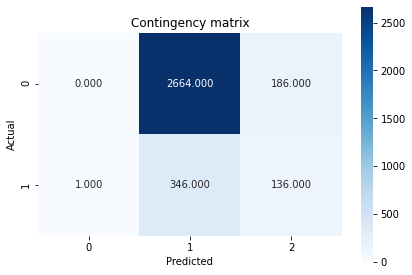

In [22]:
cont_matrix = metrics.cluster.contingency_matrix(Y,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [23]:
adjusted_rand_index = metrics.adjusted_rand_score(Y, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.20184369179051267, 0.556193882912843]


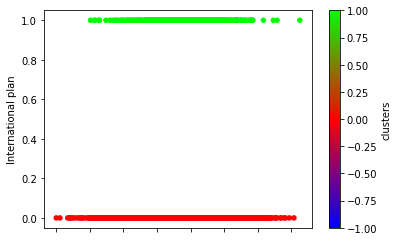

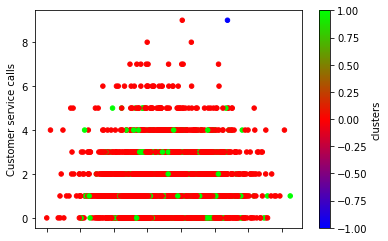

In [24]:
# Plot clusters found using DBSCAN
data['clusters'] = clusters
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'International plan', c = 'clusters', colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'Customer service calls', c = 'clusters', colormap = plt.cm.brg)
# ax.set(title = 'iris data', xlabel = 'petal width', ylabel = 'petal length')

**Question 04 (of 07): How many clusters were found using DBSCAN?**

**Answer:** There were `3` clusters found using DBSCAN

**Question 05 (of 07): What can you conclude about the clusters found using DBSCAN from the plot and the evaluation metrics?**

**Answer:** The clusters formed using DBSCAN are more than the number of classes of the actual data.
It has again basically separate the clusters based on the international plan attribute. As seen from the evaluation metrics, the rand score is pretty low indicating the algorithm has not clustered the classes as expected. DBSCAN clusters the points based on the eps distance and the min points, the plots however do not show separate clusters in the customer service calls dimension, it is highly overlapped and also gave on extra class label/cluster because of one point which is not within eps distance.

**Question 06 (of 07): Which of the clustering techniques had the best performance?**

**Answer:** The Kmeans and the single linkage hierarchical clusters give a better performance than the other techniques. However, all of them are not good enough techniques for this data.

**Task 11 (of 11): Compute evaluation metrics for the true clusters of the data (churned/non-churned).**

In [25]:
silhouette_coefficient = metrics.silhouette_score(X_scaled, Y, metric = "euclidean")
print(silhouette_coefficient)

0.29452252272489277


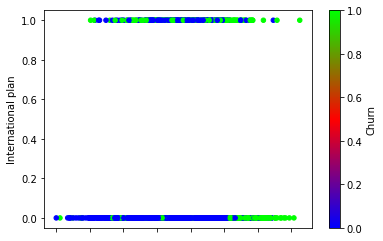

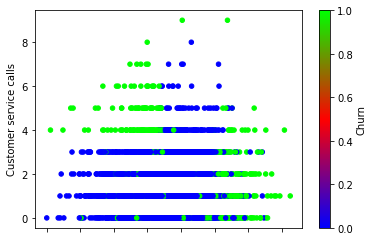

In [26]:
# Plot true clusters (churned/non-churned)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'International plan', c = 'Churn', colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'Customer service calls', c = 'Churn', colormap = plt.cm.brg)

**Question 07 (of 07): What can you conclude about the true clusters of the data from the plot and the evaluation metrics?**

**Answer:** The silhoutte score clearly indicates that the clusters overlap and there is no proper separation in classes based on the attributes chosen. The value is low meaning that the clusters are closer to each other and the cohesion is not very great. This is further proved by the plots in which the international plan which was generally separated in 2 clusters has overlapping clusterts.